## EDA (Análisis Exploratorio de Datos)

**Librerías necesarias:**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

**Importar datasets**

In [69]:
# Importar la hoja de "hechos" del archivo "homicidios.xls"
df_hechos = pd.read_excel('datasets\\homicidios.xlsx', sheet_name=0) 

In [70]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [71]:
# Importar la hoja de "VICTIMAS" del archivo "homicidios.xls"
df_victimas = pd.read_excel('datasets\\homicidios.xlsx', sheet_name=2)

In [72]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


**Manipulación de datos:**

In [73]:
#Cambiar el nombre de la columna "id_hecho" para hacer un inner 

df_victimas=df_victimas.rename(columns={'ID_hecho':'ID'})

In [74]:
df_victimas.head(1)

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00


In [75]:
df_hechos.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


Se realiza un merge de los dos frames:

In [76]:
merged_df = df_hechos.merge(df_victimas, on='ID', how='inner')

In [77]:
merged_df.head(3)

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,PASAJEROS,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,AUTO,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00


Verificar columnas iguales:

In [78]:
def encontrar_columnas_diferentes(df):
    columnas_diferentes = []
    columnas_iguales = []

    for columna1 in df.columns:
        for columna2 in df.columns:
            if columna1 != columna2:
                if (df[columna1] == df[columna2]).all():
                    columnas_iguales.append((columna1, columna2))
                elif not (df[columna1] == df[columna2]).all():
                    columnas_diferentes.append((columna1, columna2))

    return columnas_iguales, columnas_diferentes

In [79]:

columnas_iguales, columnas_diferentes = encontrar_columnas_diferentes(merged_df[merged_df.columns])

print("Pares de columnas iguales:")
for columna1, columna2 in columnas_iguales:
    print(f"{columna1} y {columna2} son iguales")

Pares de columnas iguales:
AAAA_x y AAAA_y son iguales
MM_x y MM_y son iguales
AAAA_y y AAAA_x son iguales
MM_y y MM_x son iguales


In [80]:
# Eliminar la columna 'AAAA_y','MM_y'
dataframe = merged_df.drop(['AAAA_y','MM_y'],axis=1)

In [81]:
dataframe.head(1)

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,PARTICIPANTES,VICTIMA_x,ACUSADO,FECHA_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,MOTO-AUTO,MOTO,AUTO,2016-01-01,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00


Las columnas FECHA , DIA y VICTIMAS no son iguales, verificando datos 

In [82]:
indices=[]
for index, row  in dataframe[['FECHA_x','FECHA_y', 'DD_x','DD_y', 'VICTIMA_x',  'VICTIMA_y']].iterrows():

    if row['FECHA_x'] !=row['FECHA_y']:
        indices.append(index)


    if row['DD_x'] !=row['DD_y']:
        indices.append(index)
    if row['VICTIMA_x'] !=row['VICTIMA_y']:
        indices.append(index)



In [83]:
indices

[65, 204, 204, 237, 238, 602, 603]

Las columnas fecha_Y, victima_y de victima_y tiene la misma fecha de fallecimiento por lo tanto se elimina

In [84]:
dataframe[['FECHA_x','FECHA_y', 'DD_x','DD_y', 'VICTIMA_x',  'VICTIMA_y','FECHA_FALLECIMIENTO','ACUSADO']].iloc[indices]

,FECHA_x,FECHA_y,DD_x,DD_y,VICTIMA_x,VICTIMA_y,FECHA_FALLECIMIENTO,ACUSADO
65,2016-07-02,2016-07-03,3,3,MOTO,MOTO,2016-07-03 00:00:00,OBJETO FIJO
204,2017-05-24,2017-05-29,24,29,MOTO,MOTO,2017-05-29 00:00:00,SD
204,2017-05-24,2017-05-29,24,29,MOTO,MOTO,2017-05-29 00:00:00,SD
237,2017-09-02,2017-09-02,2,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
238,2017-09-02,2017-09-02,2,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
602,2020-12-05,2020-12-05,5,5,PEATON_MOTO,PEATON,2020-12-05 00:00:00,MOTO
603,2020-12-05,2020-12-05,5,5,PEATON_MOTO,MOTO,2020-12-05 00:00:00,MOTO


In [85]:
# Eliminar la columna 'AAAA_y','MM_y'
dataframe = dataframe.drop(['DD_y','FECHA_y' ],axis=1)

verificamos que hay un valor atipico en la columna victima_x donde dice que es objeto fijo lo cual no es congruente, con esto podemos deducir que pertenece ese valor a la columna acusado y se hara el cambio

In [86]:
dataframe[['FECHA_x', 'DD_x', 'VICTIMA_x',  'VICTIMA_y','FECHA_FALLECIMIENTO','ACUSADO']].iloc[indices]

,FECHA_x,DD_x,VICTIMA_x,VICTIMA_y,FECHA_FALLECIMIENTO,ACUSADO
65,2016-07-02,3,MOTO,MOTO,2016-07-03 00:00:00,OBJETO FIJO
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
237,2017-09-02,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
238,2017-09-02,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
602,2020-12-05,5,PEATON_MOTO,PEATON,2020-12-05 00:00:00,MOTO
603,2020-12-05,5,PEATON_MOTO,MOTO,2020-12-05 00:00:00,MOTO


In [87]:
# Encuentra las filas donde 'VICTIMA_x' es igual a 'OBJETO FIJO'
filas_objeto_fijo = dataframe['VICTIMA_x'] == 'OBJETO FIJO'

# Almacena temporalmente los valores de 'VICTIMA_x' en una columna temporal
dataframe.loc[filas_objeto_fijo, 'TEMP'] = dataframe.loc[filas_objeto_fijo, 'VICTIMA_x']

# Intercambia los valores entre 'VICTIMA_x' y 'ACUSADO'
dataframe.loc[filas_objeto_fijo, 'VICTIMA_x'] = dataframe.loc[filas_objeto_fijo, 'ACUSADO']
dataframe.loc[filas_objeto_fijo, 'ACUSADO'] = dataframe.loc[filas_objeto_fijo, 'TEMP']

# Elimina la columna temporal 'TEMP'
dataframe.drop(columns=['TEMP'], inplace=True)

In [88]:
dataframe[['FECHA_x', 'DD_x', 'VICTIMA_x',  'VICTIMA_y','FECHA_FALLECIMIENTO','ACUSADO']].iloc[indices]

,FECHA_x,DD_x,VICTIMA_x,VICTIMA_y,FECHA_FALLECIMIENTO,ACUSADO
65,2016-07-02,3,MOTO,MOTO,2016-07-03 00:00:00,OBJETO FIJO
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
237,2017-09-02,2,AUTO,AUTO,2017-09-02 00:00:00,OBJETO FIJO
238,2017-09-02,2,AUTO,AUTO,2017-09-02 00:00:00,OBJETO FIJO
602,2020-12-05,5,PEATON_MOTO,PEATON,2020-12-05 00:00:00,MOTO
603,2020-12-05,5,PEATON_MOTO,MOTO,2020-12-05 00:00:00,MOTO


In [89]:
# Verificando valores de la columna victima_x y victima_y

indices=[]
for index, row  in dataframe[['FECHA_x', 'DD_x','VICTIMA_x',  'VICTIMA_y']].iterrows():

    if row['VICTIMA_x'] !=row['VICTIMA_y']:
        indices.append(index)

In [90]:
indices

[602, 603]

Podemos verificar que los unicos valores diferentes en estas columnas son los que se encuentran en el indice 602 y 603 de lo que podemos deducir que su diferencia es por que son 2 victimas en la cual se informa en la columna victima_y peaton y moto por lo tanto se eliminara la columna victima_x que viene de la tabla hechos 

In [91]:
dataframe[['VICTIMA_x',  'VICTIMA_y']].iloc[indices]

,VICTIMA_x,VICTIMA_y
602,PEATON_MOTO,PEATON
603,PEATON_MOTO,MOTO


In [92]:
dataframe = dataframe.drop(['VICTIMA_y'],axis=1)

In [93]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA_x                717 non-null    datetime64[ns]
 3   AAAA_x                 717 non-null    int64         
 4   MM_x                   717 non-null    int64         
 5   DD_x                   717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

Renombrar columnas:

In [94]:
dataframe.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA_x', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

In [95]:
#codigo para renombrar columnas
dataframe = dataframe.rename(columns ={'FECHA_x':'FECHA', 'AAAA_x': 'AAAA','MM_x': 'MM','DD_x': 'DD','pos x': 'Longitud','pos y':'Latitud','VICTIMA_x':'VICTIMA'  })

In [96]:
dataframe.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00


La instrucción dataframe['N_VICTIMAS']=1 cambiará el valor de la columna N_VICTIMAS de todas las filas del DataFrame a 1. Esto significa que todas las filas que actualmente tienen un valor mayor que 1 en la columna N_VICTIMAS se convertirán en filas con un solo registro.

In [97]:
dataframe['N_VICTIMAS']=1

Corregir formato de longitud y Latitud:

In [98]:
# Intenta convertir las columnas 'Latitud' y 'Longitud' en números flotantes con 'errors='coerce''
dataframe['Latitud'] = pd.to_numeric(dataframe['Latitud'], errors='coerce')
dataframe['Longitud'] = pd.to_numeric(dataframe['Longitud'], errors='coerce')

# Encuentra las filas con valores problemáticos (NaN) en las columnas 'Latitud' o 'Longitud'
filas_con_nan = dataframe[(dataframe['Latitud'].isna()) | (dataframe['Longitud'].isna())]

# Imprime las filas con valores problemáticos para identificar y corregir los datos
print(filas_con_nan)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
39   2016-0052           1 2016-04-20  2016   4  20  20:00:00  20   
108  2016-0136           1 2016-10-25  2016  10  25  00:00:00   0   
121  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   
141  2016-0174           1 2016-12-27  2016  12  27  00:00:00   0   
182  2017-0042           1 2017-04-10  2017   4  10  09:00:00   9   
186  2017-0050           1 2017-04-28  2017   4  28  11:08:08  11   
187  2017-0050           1 2017-04-28  2017   4  28  11:08:08  11   
188  2017-0051           1 2017-05-01  2017   5   1  03:47:47   3   
266  2017-0140           1 2017-11-19  2017  11  19  23:22:17  23   
327  2018-0039           1 2018-04-21  2018   4  21  22:15:00  22   
564  2020-0026           1 2020-05-17  2020   5  17  06:40:00   6   
578  2020-0039           1 2020-09-01  2020   9   1  19:17:42  19   
642  2021-0023           1 2021-03-01  2021   3   1  09:20:00   9   

                             LUGA

**Buscar valores sin dato SD**

In [99]:
# Valor 'SD' a buscar
valor_a_buscar = 'SD'

# Iterar a través de cada columna y encontrar las celdas que contienen el valor 'SD'
for columna in dataframe.columns:
    celdas_con_valor_sd = dataframe[dataframe[columna] == valor_a_buscar]
    
    # Imprimir las celdas con el valor 'SD' en la columna actual
    if not celdas_con_valor_sd.empty:
        print({columna})

{'HORA'}
{'HH'}
{'LUGAR_DEL_HECHO'}
{'VICTIMA'}
{'ACUSADO'}
{'ROL'}
{'SEXO'}
{'EDAD'}
{'FECHA_FALLECIMIENTO'}


Verificar columna HORA:

In [100]:
valores_igual_0 = dataframe.loc[dataframe['HORA'] == 'SD']
valores_igual_0

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
536,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,Point (94643.11254058 103831.57115061),-58.521694,-34.594716,MOTO-MOTO,MOTO,MOTO,CONDUCTOR,MASCULINO,24,2019-12-18 00:00:00


In [101]:
# se realiza la funcion para intercambiar valores
def columns_modifier(mode,DF,columns, value, replace=None):
    df=DF.copy()
    if mode == 'swap':
        for index, row in df.iterrows():

            value_1=row[columns[0]]
            value_2=row[columns[1]]

            if value_1== value:
                temp=value_1
                df.at[index, columns[0]] = value_2
                df.at[index, columns[1]] = temp
    if mode == 'replace':
        for index, row in df.iterrows():
            to_replace=row[columns[0]]

            if to_replace == value:
                df.at[index, columns[0]] = replace
    return df

Reemplazamos valor SD por nan:

In [102]:
columna=['HH']
dataframe=columns_modifier('replace',dataframe,columna,'SD',np.nan)

In [103]:
columna=['HORA']
dataframe=columns_modifier('replace',dataframe,columna,'SD',np.nan)

In [104]:
columna=['EDAD']
dataframe=columns_modifier('replace',dataframe,columna,'SD',np.nan)

Comprobar

In [105]:
valores_igual_0 = dataframe.loc[dataframe['HORA'] == 'SD']
valores_igual_0

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO


Cambiar formato de hora

In [106]:
def convertir_hora(decimal_hora):
    # Extraer la parte entera y decimal de la hora
    horas_enteras = int(decimal_hora)
    minutos_decimales = (decimal_hora - horas_enteras) * 60

    # Formatear como cadena de tiempo (HH:MM)
    hora_formateada = f"{horas_enteras:02d}:{int(minutos_decimales):02d}"

    return hora_formateada

Cambio de SD en la columna FECHA_FALLECIMIENTO por nan:

In [107]:
columna=['FECHA_FALLECIMIENTO']

dataframe=columns_modifier('replace',dataframe,columna,'SD',np.nan)

In [108]:
# Llenando los valores faltantes en la columna 'HORA' del DataFrame 'dataframe'
dataframe['HORA']=dataframe['HORA'].fillna(convertir_hora(dataframe['HH'].mean()))
#  Columna 'HH' en el DataFrame 'dataframe'
dataframe['HH']=dataframe['HH'].fillna(dataframe['HH'].mean()).apply(int)

In [109]:
dataframe.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00


Identificar y mostrar las filas en el DataFrame que contienen valores en la columna 'HORA' que no cumplen con el formato de hora "HH:MM:SS".

In [110]:

# Convertir los valores de la columna "hora" a cadenas de texto
dataframe['HORA'] = dataframe['HORA'].astype(str)

# Verificar si el valor en cada fila tiene un formato de hora válido
formato_correcto = dataframe['HORA'].str.match(r'^\d{2}:\d{2}:\d{2}$')

# Filtrar las filas con formato diferente
filas_con_formato_diferente = dataframe[~formato_correcto]

# Mostrar las filas con formato diferente
print("Filas con formato diferente:")
print(filas_con_formato_diferente)

Filas con formato diferente:
            ID  N_VICTIMAS      FECHA  AAAA  MM  DD                 HORA  HH  \
457  2019-0022           1 2019-03-15  2019   3  15  1900-01-02 00:00:00   0   
459  2019-0024           1 2019-03-19  2019   3  19  1900-01-14 07:12:00   7   
514  2019-0080           1 2019-09-17  2019   9  17  1900-01-04 18:40:00  18   
536  2019-0103           1 2019-12-18  2019  12  18                11:33  11   

                                       LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  \
457  ENTRE RIOS AV. BAJO PUENTE AUTOPISTA (1260 APROX)       AVENIDA  ...   
459                       ANTARTIDA ARGENTINA AV. 1325       AVENIDA  ...   
514                       CABILDO AV. y PAZ, GRAL. AV.      GRAL PAZ  ...   
536                            PAZ, GRAL. AV. Y GRIVEO      GRAL PAZ  ...   

                                   XY (CABA)   Longitud    Latitud  \
457  Point (106608.39392805 100635.27735528) -58.391238 -34.623522   
459  Point (108368.93688513 104860.74716674)

Convertir los valores en la columna 'HORA' en objetos de tiempo y luego identificar y mostrar las filas que contienen errores de conversión, es decir, aquellas en las que el formato de la hora no es válido y no se puede convertir correctamente en un objeto de tiempo.

In [111]:
# Convertir los valores de la columna "hora" a objetos de tiempo (datetime)
dataframe['HORA'] = pd.to_datetime(dataframe['HORA'], errors='coerce')

# Identificar filas con errores de conversión (formato incorrecto)
filas_con_errores = dataframe[dataframe['HORA'].isna()]

# Mostrar las filas con formato diferente
print("Filas con formato diferente:")
print(filas_con_errores)

Filas con formato diferente:
Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), Longitud, Latitud, PARTICIPANTES, VICTIMA, ACUSADO, ROL, SEXO, EDAD, FECHA_FALLECIMIENTO]
Index: []

[0 rows x 25 columns]


C:\Users\alexi\AppData\Local\Temp\ipykernel_3256\1323556901.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe['HORA'] = pd.to_datetime(dataframe['HORA'], errors='coerce')


**Crea la columna 'semestre' para el calculo del KPI**

In [112]:
# Extraer el mes de la fecha y calcular el semestre
dataframe['SEMESTRE'] = (dataframe['FECHA'].dt.month - 1) // 6 + 1


In [113]:
dataframe.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,2016-0001,1,2016-01-01,2016,1,1,2023-12-04 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00,1


## Gráficos y análisis

**Relación Fecha-Número de víctimas:**

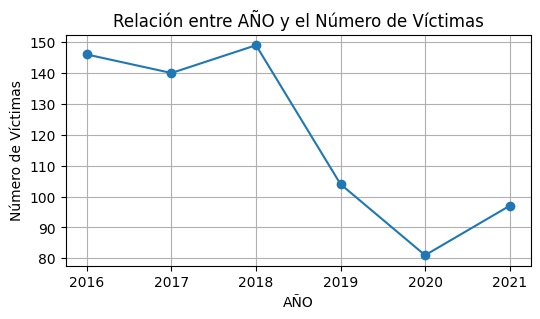

In [114]:
# Agrupa los datos por fecha y suma el número de víctimas en cada fecha
victimas_por_fecha = dataframe.groupby('AAAA')['N_VICTIMAS'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(6, 3))  # Ajusta el tamaño de la gráfica según tus preferencias
plt.plot(victimas_por_fecha['AAAA'], victimas_por_fecha['N_VICTIMAS'], marker='o', linestyle='-')
plt.title('Relación entre AÑO y el Número de Víctimas')
plt.xlabel('AÑO')
plt.ylabel('Número de Víctimas')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [115]:
victimas_por_fecha

,AAAA,N_VICTIMAS
0,2016,146
1,2017,140
2,2018,149
3,2019,104
4,2020,81
5,2021,97



**Análisis de la gráfica #1:**

- Tendencia temporal

La gráfica presenta datos desde 2016 hasta 2021, lo que permite analizar la evolución del número de víctimas a lo largo de este periodo. Se observa que el número de víctimas disminuyó desde 2018 hasta 2021, tras un pico en 2018.

- Pico en 2018

El año 2018 destaca como el año con el mayor número de víctimas, con 149. Es necesario investigar las causas de este aumento significativo en comparación con los años anteriores y posteriores.

- Disminución en 2019 y 2020

En 2019, el número de víctimas disminuyó a 104, y en 2020 disminuyó aún más a 81. Esta tendencia a la baja podría deberse a una serie de factores, como políticas gubernamentales, cambios en la economía o medidas de seguridad.

- Aumento en 2021

En 2021, el número de víctimas aumentó nuevamente a 97. Es necesario investigar las causas de este aumento, que podría deberse a factores similares a los que provocaron el pico en 2018.

- Posibles factores influyentes

Para un análisis más completo, sería necesario considerar posibles factores que podrían haber contribuido a las variaciones en el número de víctimas a lo largo de estos años. Algunos factores que podrían influir incluyen:

Políticas gubernamentales
Cambios en la economía
Medidas de seguridad
Otros factores sociales o económicos
Estadísticas descriptivas


**Víctimas por columna**

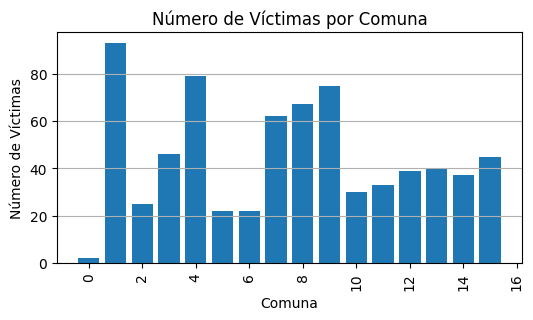

In [116]:
# Cuenta el número de víctimas en cada comuna
victimas_por_comuna = dataframe.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()

# Crea la gráfica de barras
plt.figure(figsize=(6, 3))
plt.bar(victimas_por_comuna['COMUNA'], victimas_por_comuna['N_VICTIMAS'])
plt.title('Número de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

In [117]:
victimas_por_comuna

,COMUNA,N_VICTIMAS
0,0,2
1,1,93
2,2,25
3,3,46
4,4,79
5,5,22
6,6,22
7,7,62
8,8,67
9,9,75


**Análisis de la gráfica #2**

- Distribución de víctimas

La tabla muestra los datos de 16 comunas diferentes, numeradas del 0 al 15. La cantidad de víctimas varía significativamente entre las comunas, desde 2 hasta 93.

- Comuna con el mayor número de víctimas

La comuna con el mayor número de víctimas es la Comuna 1, con 93 víctimas. Este dato es llamativo y podría indicar un área de interés para investigar más a fondo las razones detrás de esta cifra alta.

- Comuna con el menor número de víctimas

La Comuna 0 tiene el menor número de víctimas, con solo 2. Este dato también es significativo y podría ser un punto de partida para investigar las condiciones que llevan a esta cifra baja.

- Distribución general

La distribución de víctimas en estas comunas parece ser bastante heterogénea, ya que algunas comunas tienen un número significativamente mayor de víctimas que otras.

- Análisis estadístico

Sería útil realizar un análisis estadístico más detallado para comprender mejor la variabilidad en el número de víctimas entre las comunas. Esto podría incluir cálculos como la media, la mediana, la desviación estándar y otros estadísticos descriptivos.

- Factores influyentes

Para un análisis más completo, sería importante considerar factores que podrían influir en el número de víctimas en cada comuna. Estos factores podrían incluir:

La densidad de población
La presencia de servicios de seguridad
Medidas de prevención del delito
Otros factores sociales, económicos o culturales

**Mapa de calor de siniestros**

In [118]:
# Crea un mapa de calor utilizando las coordenadas de longitud y latitud
m = folium.Map(location=[dataframe['Latitud'].mean(), dataframe['Longitud'].mean()], zoom_start=12)

# Convierte los datos de longitud y latitud en una lista de listas, excluyendo valores NaN
heat_data = [[row['Latitud'], row['Longitud']] for index, row in dataframe.dropna(subset=['Latitud', 'Longitud']).iterrows()]

# Agrega el mapa de calor al mapa folium
HeatMap(heat_data).add_to(m)

# Muestra el mapa en el entorno interactivo
display(m)


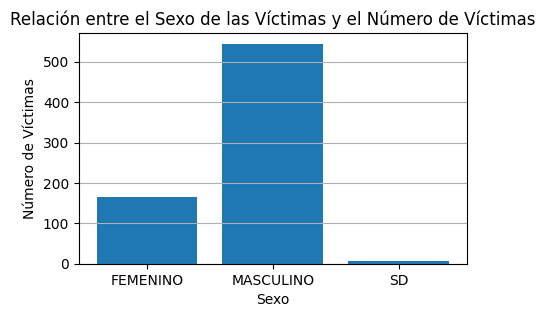

In [119]:
# Agrupa los datos por sexo y suma el número de víctimas en cada categoría
victimas_por_sexo = dataframe.groupby('SEXO')['VICTIMA'].count().reset_index()

# Crea la gráfica de barras
plt.figure(figsize=(5, 3))  # Ajusta el tamaño de la gráfica según tus preferencias
plt.bar(victimas_por_sexo['SEXO'], victimas_por_sexo['VICTIMA'])
plt.title('Relación entre el Sexo de las Víctimas y el Número de Víctimas')
plt.xlabel('Sexo')
plt.ylabel('Número de Víctimas')
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()


In [120]:
victimas_por_sexo

,SEXO,VICTIMA
0,FEMENINO,166
1,MASCULINO,545
2,SD,6



**Análisis de la distribución de víctimas por género**

- Distribución por género

El DataFrame presenta dos categorías principales de género: femenino y masculino. La categoría femenina tiene 166 víctimas, mientras que la categoría masculina tiene 545 víctimas.

- Diferencia significativa en el número de víctimas

Es evidente que hay una diferencia significativa en el número de víctimas entre los géneros. El género masculino tiene un número mucho mayor de víctimas que el género femenino. Esta diferencia es de aproximadamente 3.29:1.

- Proporción de género

La proporción de género es una medida que indica la relación entre dos categorías. En este caso, la proporción de género masculino a femenino es de 3.29:1. Esto significa que por cada mujer víctima, hay 3.29 hombres víctimas.

- Implicaciones y análisis adicional

Esta diferencia en el número de víctimas entre géneros podría ser el resultado de múltiples factores. Algunos de estos factores podrían incluir:  La distribución de roles de género en la sociedad, la exposición a diferentes riesgos o la subnotificación de casos en función del género.

## Histograma de Edades

In [121]:
# Creamos tres categorías de edad
categorias_edad = pd.cut(dataframe['EDAD'], bins=[0, 18, 55, 95], labels=['Niños', 'Adultos Jóvenes', 'Adultos Mayores'])

# Agregamos la nueva columna 'CATEGORIA_EDAD' al DataFrame original
dataframe['CATEGORIA_EDAD'] = categorias_edad


In [122]:
victimas_categoria_edad = dataframe.groupby('CATEGORIA_EDAD')['VICTIMA'].count().reset_index()

C:\Users\alexi\AppData\Local\Temp\ipykernel_3256\2147221925.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  victimas_categoria_edad = dataframe.groupby('CATEGORIA_EDAD')['VICTIMA'].count().reset_index()


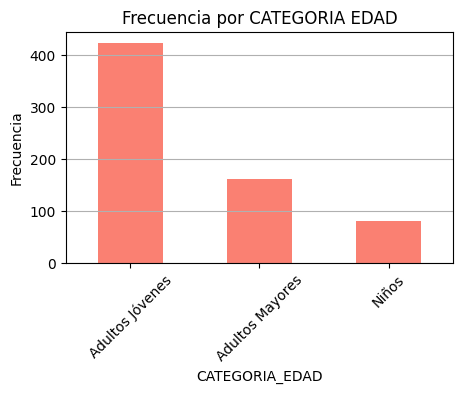

In [123]:
plt.figure(figsize=(5, 3))
dataframe['CATEGORIA_EDAD'].value_counts().plot(kind='bar', color='salmon')
plt.title('Frecuencia por CATEGORIA EDAD')
plt.xlabel('CATEGORIA_EDAD')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [124]:
victimas_categoria_edad

,CATEGORIA_EDAD,VICTIMA
0,Niños,80
1,Adultos Jóvenes,423
2,Adultos Mayores,161



**Análisis de la distribución de muertes por siniestros viales por categoría de edad**

- Distribución por categoría de edad

El DataFrame presenta tres categorías principales de edad: niños, adultos jóvenes y adultos mayores. La categoría de niños tiene 80 muertes por siniestros viales, la categoría de adultos jóvenes tiene 262 y la categoría de adultos mayores tiene 322.

- Diferencias en el número de muertes por categoría de edad

Se observan diferencias significativas en el número de muertes por siniestros viales entre las categorías de edad. La categoría de adultos mayores tiene el mayor número de muertes, seguida por la categoría de adultos jóvenes, mientras que la categoría de niños tiene el menor número de muertes.

- Interpretación de los resultados

Estas diferencias en el número de muertes por categoría de edad podrían estar relacionadas con la vulnerabilidad de cada grupo de edad en siniestros viales, así como con la exposición a diferentes riesgos en la carretera.

- Análisis demográfico

Sería útil considerar las características demográficas de cada grupo de edad, como la población total en cada categoría, para comprender mejor si estas diferencias son proporcionales a la población en riesgo.

- Prevención y seguridad vial

Estos datos pueden ser útiles para evaluar políticas y programas de seguridad vial dirigidos a grupos específicos de edad. Por ejemplo, si los adultos mayores tienen un alto número de muertes en siniestros viales, podría ser importante implementar medidas adicionales de seguridad para este grupo en particular, como campañas de concienciación y mejoras en las infraestructuras viales.

**Diagrama de Barras por Tipo de Calle**

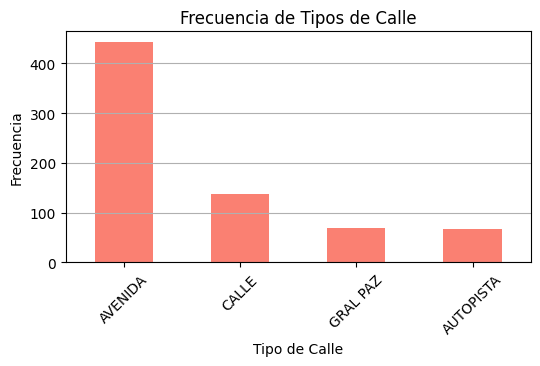

<Figure size 640x480 with 0 Axes>

In [125]:
plt.figure(figsize=(6, 3))
dataframe['TIPO_DE_CALLE'].value_counts().plot(kind='bar', color='salmon')
plt.title('Frecuencia de Tipos de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
plt.savefig('distribucion_tipo_calle.jpg') 

In [126]:
victimas_tipo_calle = dataframe.groupby('TIPO_DE_CALLE')['VICTIMA'].count().reset_index()

In [127]:
victimas_tipo_calle

,TIPO_DE_CALLE,VICTIMA
0,AUTOPISTA,68
1,AVENIDA,442
2,CALLE,138
3,GRAL PAZ,69


**Análisis de la distribución de víctimas por tipo de calle**

- Distribución por tipo de calle

El DataFrame presenta cuatro categorías principales de tipo de calle: autopista, avenida, calle y General Paz. La categoría de avenida tiene la mayor cantidad de víctimas por siniestros viales, con 442. Le sigue la categoría de calle con 138, la categoría de General Paz con 69 y la categoría de autopista con 68.

- Diferencias en el número de víctimas por tipo de calle

Se observan diferencias significativas en el número de víctimas por siniestros viales entre los tipos de calle. La categoría de avenida tiene el mayor número de víctimas, seguida por la categoría de autopista. La categoría de calle tiene un número significativamente menor de víctimas, y la categoría de General Paz tiene el menor número de víctimas.

- Proporciones de víctimas por tipo de calle

Calcular la proporción de víctimas en cada tipo de calle puede ayudar a comprender mejor la relación entre ellos. Por ejemplo, la proporción de víctimas en avenidas es de 68.3%, mientras que la proporción de víctimas en autopistas es de 6.9%. Esto sugiere que las avenidas tienen un mayor riesgo de siniestros viales que las autopistas.

- Interpretación de los resultados

Estas diferencias en el número de víctimas por tipo de calle podrían estar relacionadas con una serie de factores, como la velocidad máxima permitida en cada tipo de carretera, el volumen de tráfico, la presencia de semáforos y señalización, y otros factores de seguridad vial.

- Medidas de seguridad vial

Los datos pueden ser útiles para evaluar la efectividad de las medidas de seguridad vial en diferentes tipos de carreteras. Por ejemplo, si las avenidas tienen una alta cantidad de víctimas, podría ser necesario revisar las medidas de seguridad y la infraestructura en ese tipo de carretera.

**Diagrama de Barras Apiladas por Rol y victima:**

In [128]:
victimas_rol1 = dataframe.groupby(['ROL', 'VICTIMA']).size().reset_index(name='COUNT')

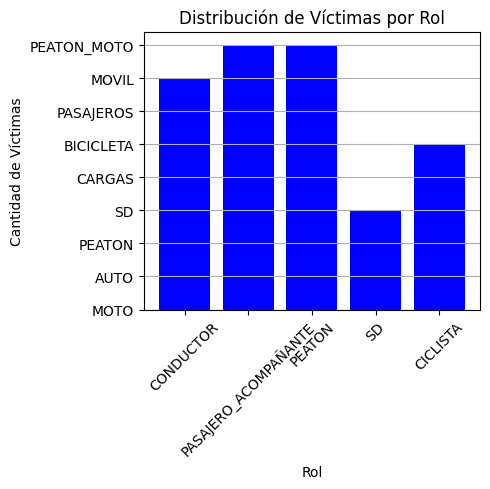

In [129]:
# Crear un gráfico de barras
plt.figure(figsize=(5, 5))
plt.bar(dataframe['ROL'], dataframe['VICTIMA'], color='blue')

# Personalizar el gráfico
plt.title('Distribución de Víctimas por Rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45)  # Para rotar las etiquetas del eje x si es necesario
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()


In [130]:
victimas_rol1

,ROL,VICTIMA,COUNT
0,CICLISTA,BICICLETA,29
1,CONDUCTOR,AUTO,65
2,CONDUCTOR,CARGAS,3
3,CONDUCTOR,MOTO,261
4,CONDUCTOR,MOVIL,1
5,PASAJERO_ACOMPAÑANTE,AUTO,29
6,PASAJERO_ACOMPAÑANTE,CARGAS,4
7,PASAJERO_ACOMPAÑANTE,MOTO,38
8,PASAJERO_ACOMPAÑANTE,MOVIL,2
9,PASAJERO_ACOMPAÑANTE,PASAJEROS,5


**Análisis de la distribución de víctimas por rol y tipo de vehículo**

- Distribución de roles y tipos de vehículos

El DataFrame presenta datos sobre el rol de las víctimas en siniestros viales, el tipo de vehículo involucrado y la cantidad de casos para cada combinación.

- Las combinaciones de roles y tipos de vehículos incluyen:

Conductor de auto
Conductor de moto
Ciclista
Pasajero de auto
Pasajero de moto
Peaton

- Número de casos

El DataFrame también presenta el número de casos para cada combinación. Por ejemplo, la combinación "Ciclista" - "Bicicleta" tiene 29 casos. Esto significa que hubo 29 siniestros viales en los que la víctima era un ciclista que conducía una bicicleta.

- Interpretación de los resultados

Los resultados del análisis sugieren que los peatones y los ciclistas son los usuarios más vulnerables de las carreteras. Los peatones representan el 34% de las víctimas, mientras que los ciclistas representan el 12%.

Los conductores de autos y motos también representan un número significativo de víctimas. Los conductores de autos representan el 29% de las víctimas, mientras que los conductores de motos representan el 11%.

- Implicaciones y análisis adicional

Estos resultados sugieren que se deben tomar medidas para mejorar la seguridad de los peatones y los ciclistas. Estas medidas podrían incluir:

Mejorar la infraestructura vial para proteger a los peatones y ciclistas.

Implementar campañas de educación vial para concienciar a los conductores sobre la importancia de compartir la carretera con los peatones y ciclistas.

También se podrían tomar medidas para mejorar la seguridad de los conductores de autos y motos. Estas medidas podrían incluir:

Reducir los límites de velocidad.
Mejorar la seguridad de los vehículos.
Implementar campañas de educación vial para concienciar a los conductores sobre la importancia de conducir de forma segura.



Este análisis proporciona información valiosa sobre la relación entre el rol de las víctimas y el tipo de vehículo involucrado en siniestros viales. Esta información puede ser utilizada para abordar problemas de seguridad vial específicos y tomar medidas adecuadas para reducir los riesgos en las carreteras.

**Gráfico de Barras por Mes de Siniestros:**

In [131]:
victimas_por_mes = dataframe.groupby('MM')['VICTIMA'].count().reset_index()

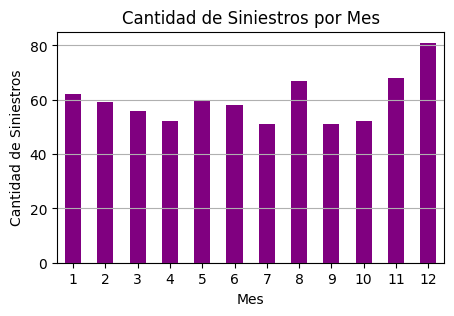

In [132]:
plt.figure(figsize=(5, 3))
dataframe.groupby('MM')['ID'].count().plot(kind='bar', color='purple')
plt.title('Cantidad de Siniestros por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [133]:
victimas_por_mes

,MM,VICTIMA
0,1,62
1,2,59
2,3,56
3,4,52
4,5,60
5,6,58
6,7,51
7,8,67
8,9,51
9,10,52



**Análisis de la distribución de víctimas de siniestros viales por mes**

- Distribución de víctimas por mes

El DataFrame presenta datos sobre el número de víctimas de siniestros viales para cada mes del año.

- Variación en el número de víctimas por mes

Se observa variación en el número de víctimas de siniestros viales en diferentes meses. El mes con el mayor número de víctimas es diciembre, con 81, mientras que el mes con la menor cantidad de víctimas es julio, con 51.

- Diferencias en la seguridad vial

Estas diferencias en el número de víctimas podrían estar relacionadas con factores como:

Condiciones climáticas: Los meses con condiciones climáticas adversas, como lluvia o nieve, podrían tener un mayor riesgo de siniestros viales.
Actividades recreativas: Los meses con más actividades recreativas, como fiestas de fin de año o navidad, podrían tener un mayor riesgo de siniestros viales.

- Políticas de seguridad vial

Estos datos pueden ser útiles para evaluar la efectividad de las políticas de seguridad vial en diferentes meses y para identificar aquellos que podrían requerir medidas de prevención adicionales.



Este análisis proporciona información valiosa sobre la distribución de víctimas de siniestros viales por mes. Esta información puede ser utilizada para mejorar la seguridad vial en diferentes meses, identificando factores de riesgo e implementando medidas de prevención.

## Exportar archivo CSV con frame para KPIs:

In [134]:
dataframe.to_csv('datasets\df_homicidios.csv', index=False)